# Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Importing the data

In [2]:
file_path = "./data/features_30_sec.csv"

In [3]:
df = pd.read_csv(file_path)

In [4]:
df.describe()

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,662030.846000,0.378682,0.086340,0.130930,0.003051,2201.780898,4.696916e+05,2242.541070,137079.155165,4571.549304,...,1.148144,60.730958,-3.966028,62.633624,0.507696,63.712586,-2.328761,66.231930,-1.095348,70.126096
std,1784.073992,0.081705,0.007735,0.065683,0.003634,715.960600,4.008995e+05,526.316473,96455.666326,1574.791602,...,4.578948,33.781951,4.549697,33.479172,3.869105,34.401977,3.755957,37.174631,3.837007,45.228512
min,660000.000000,0.171939,0.044555,0.005276,0.000004,570.040355,7.911251e+03,898.066208,10787.185064,749.140636,...,-15.693844,9.169314,-17.234728,13.931521,-11.963694,15.420555,-18.501955,13.487622,-19.929634,7.956583
25%,661504.000000,0.319562,0.082298,0.086657,0.000942,1627.697311,1.843505e+05,1907.240605,67376.554428,3380.069642,...,-1.863280,40.376442,-7.207225,40.830875,-2.007015,41.884240,-4.662925,41.710184,-3.368996,42.372865
50%,661794.000000,0.383148,0.086615,0.122443,0.001816,2209.263090,3.384862e+05,2221.392843,111977.548036,4658.524473,...,1.212809,52.325077,-4.065605,54.717674,0.669643,54.804890,-2.393862,57.423059,-1.166289,59.186117
75%,661794.000000,0.435942,0.091256,0.175682,0.003577,2691.294667,6.121479e+05,2578.469836,182371.576801,5533.810460,...,4.359662,71.691755,-0.838737,75.040838,3.119212,75.385832,0.150573,78.626444,1.312615,85.375374
max,675808.000000,0.663685,0.108111,0.397973,0.027679,4435.243901,3.036843e+06,3509.646417,694784.811549,8677.672688,...,13.457150,392.932373,11.482946,406.058868,15.388390,332.905426,14.694924,393.161987,15.369627,506.065155


We check for null values:

<AxesSubplot: >

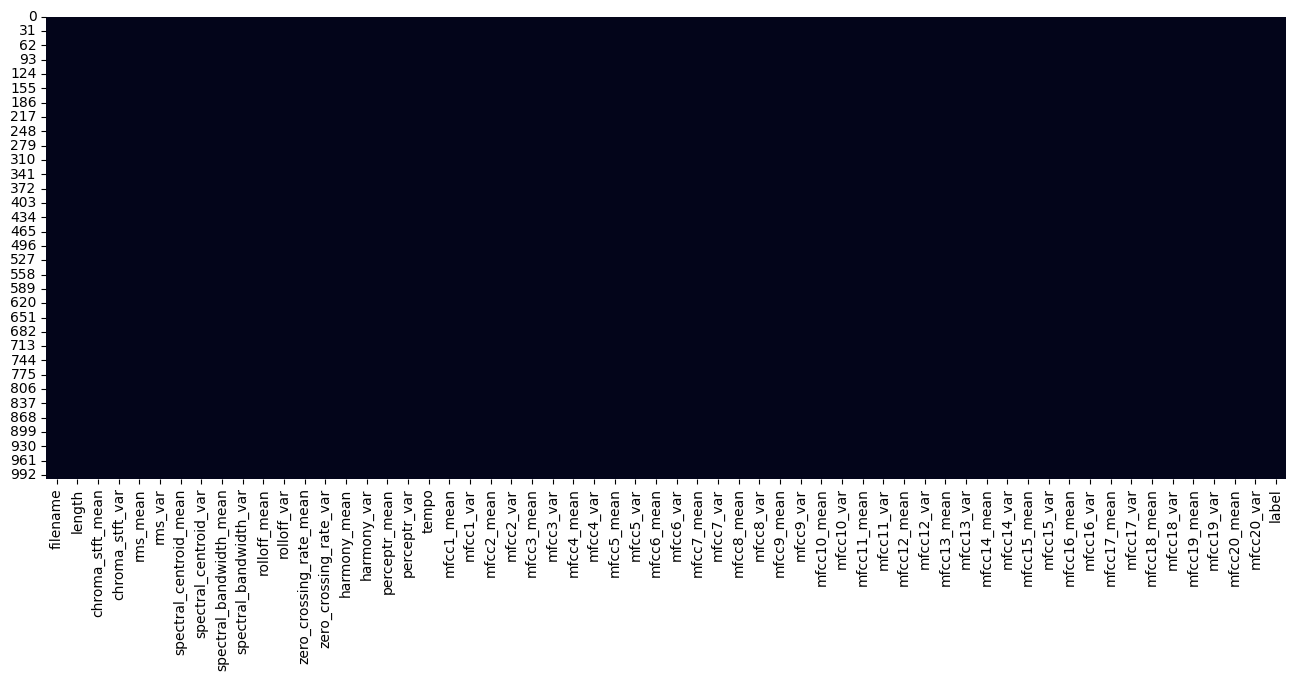

In [5]:
fig, ax = plt.subplots(figsize=(16,6))
sns.heatmap(df.isna(), cbar=False, ax=ax)

There are no missing values. 

We proceed by looking for duplicates, by checking if all filenames are unique:

In [6]:
df["filename"].nunique()

1000

There are no duplicates.

Now we can now drop the unnecessary fields:

In [7]:
df= df.drop(['filename', 'length'], axis=1)

## Setting the correct datatypes

Now we can set the correct datatypes so that we will use less memory and speed up some computations.

In [8]:
df_num = df.select_dtypes(include="number")

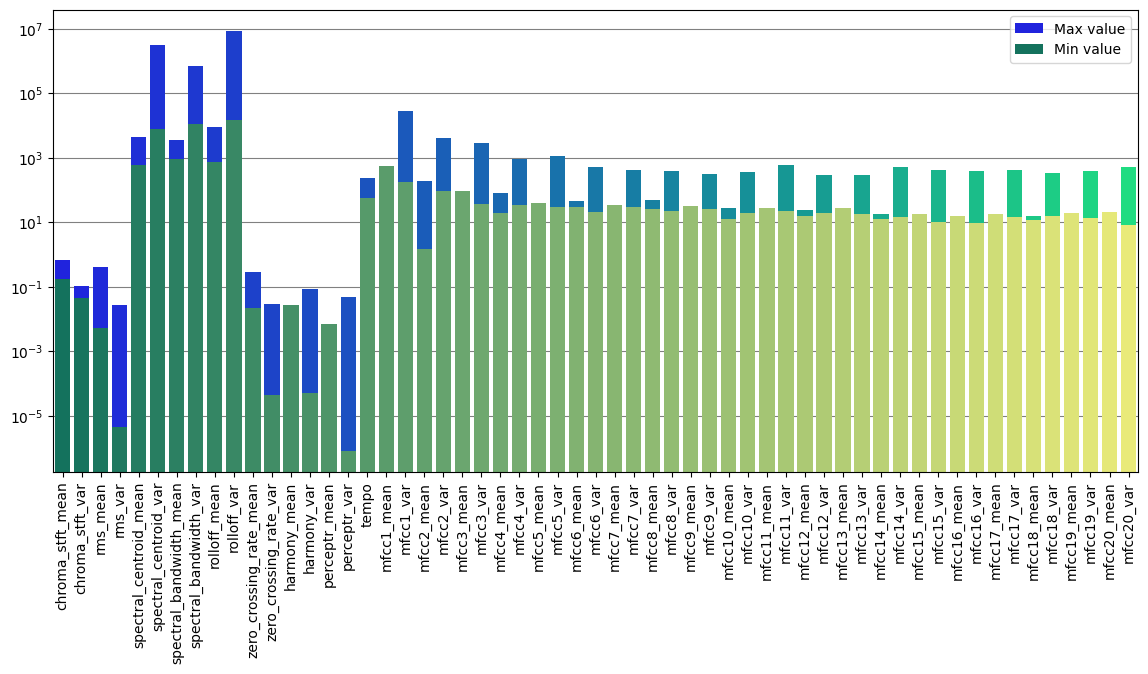

In [9]:
fig, ax = plt.subplots(figsize=(14,6))
sns.barplot(x=df_num.columns, y=abs(df_num.max()), label="Max value", palette='winter', ax=ax)
sns.barplot(x=df_num.columns, y=abs(df_num.min()), label="Min value", palette='summer', ax=ax)
plt.xticks(rotation=90)
ax.set_yscale('log')
ax.set_axisbelow(True)
ax.grid(axis='x', visible=False)
ax.grid(axis='y', color='gray')
ax.legend()

We can see that no features reach a value larger than $10^7$. We can safely use the `float32` datatytpe in place of `float64`.

In [10]:
np.finfo(np.float64), np.finfo(np.float32), np.finfo(np.float16)

(finfo(resolution=1e-15, min=-1.7976931348623157e+308, max=1.7976931348623157e+308, dtype=float64),
 finfo(resolution=1e-06, min=-3.4028235e+38, max=3.4028235e+38, dtype=float32),
 finfo(resolution=0.001, min=-6.55040e+04, max=6.55040e+04, dtype=float16))

Notice that we could even use `float16` for many features, but we prefer to keep the dataset homogeneous since that would save very little space.

Cconversion:

In [11]:
dtypes = {col:np.float32 for col in df.columns}
dtypes["label"] = "category"
df_new = df.astype(dtypes)

In [12]:
print(f"Initial size: {df.memory_usage(deep=True).sum() / 1024 / 1024:.3f} MB")
print(f"New size: {df_new.memory_usage(deep=True).sum() / 1024 / 1024:.3f} MB")

Initial size: 0.495 MB
New size: 0.219 MB


We were able to reduce the size in memory of the dataset by a factor of almost 2.

## Exploring the target

In [14]:
df = df_new

Now we investigate the target variable, which is `label`. It is a categorical variable therefore we will use a histogram:

<AxesSubplot: xlabel='label', ylabel='Count'>

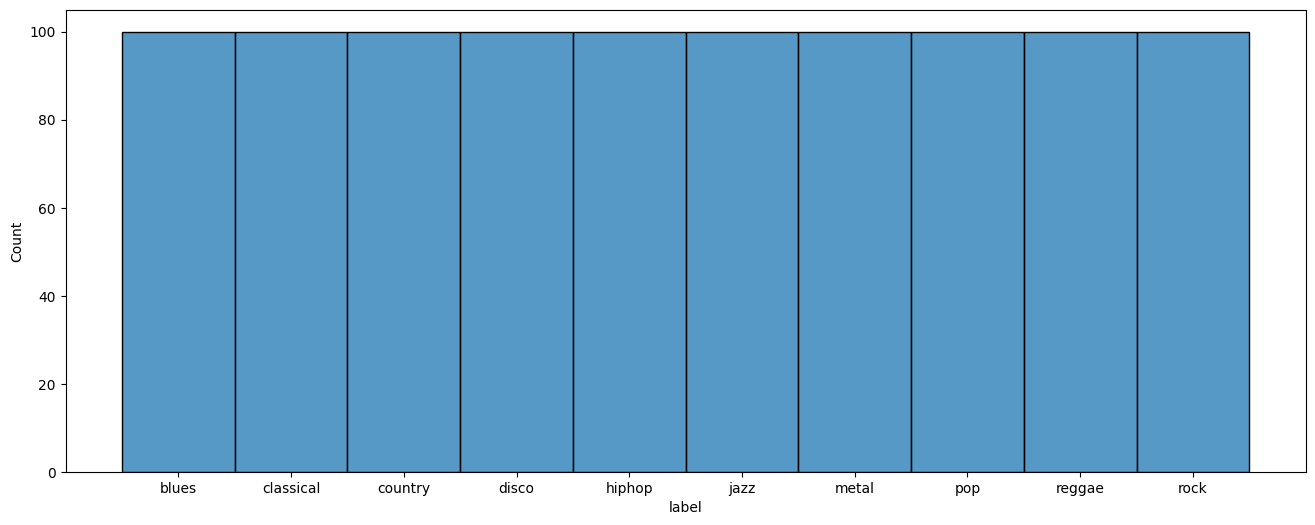

In [15]:
fig, ax = plt.subplots(figsize=(16,6))
sns.histplot(data=df, x="label", ax=ax)

# Feature selection

/tmp/ipykernel_5211/809721413.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="YlGnBu", ax=ax)


<AxesSubplot: >

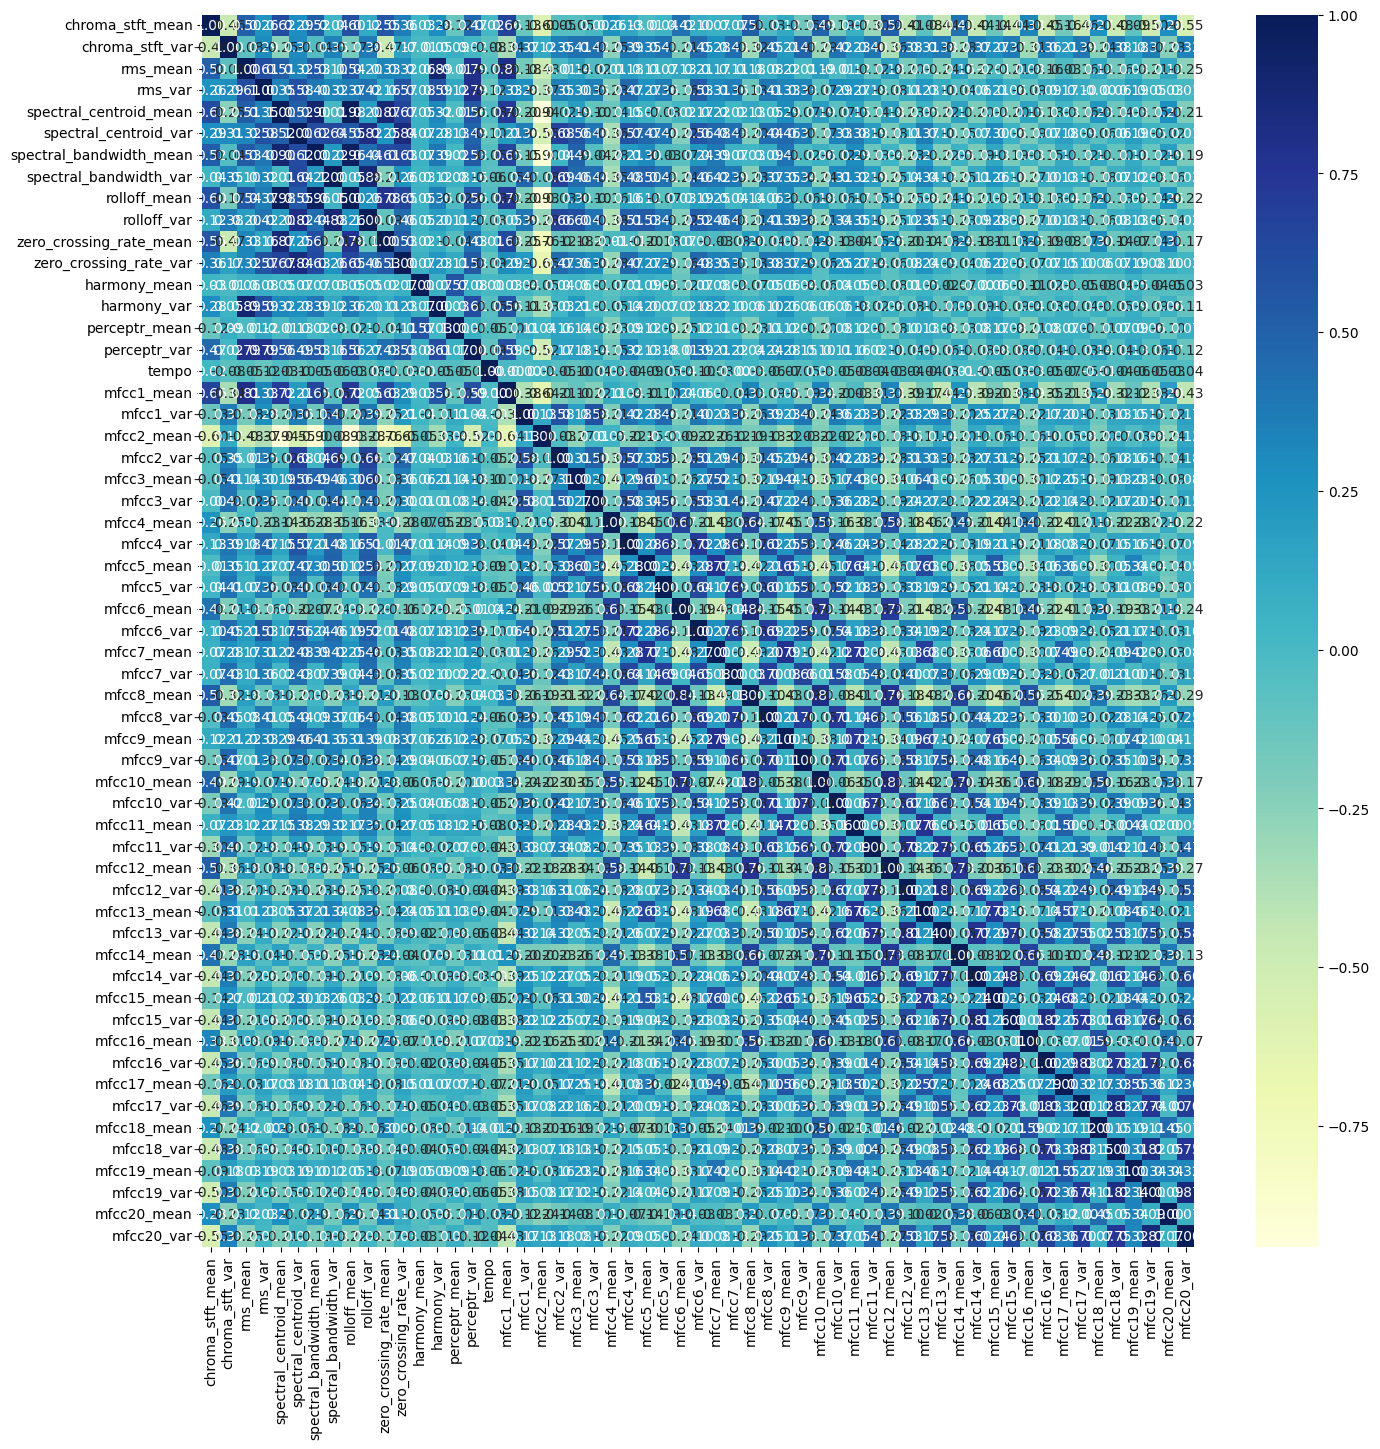

In [16]:
fig, ax = plt.subplots(figsize=(16,16))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="YlGnBu", ax=ax)

## PCA

In [17]:
labels = df["label"].to_numpy()
A = df.drop(["label"], axis=1).to_numpy()
AT_mean = np.mean(A.T, axis=1)  
X = A.T - AT_mean[:, np.newaxis]

In [18]:
U, s, VT = np.linalg.svd(X, full_matrices=False)
Phi = U.T @ X

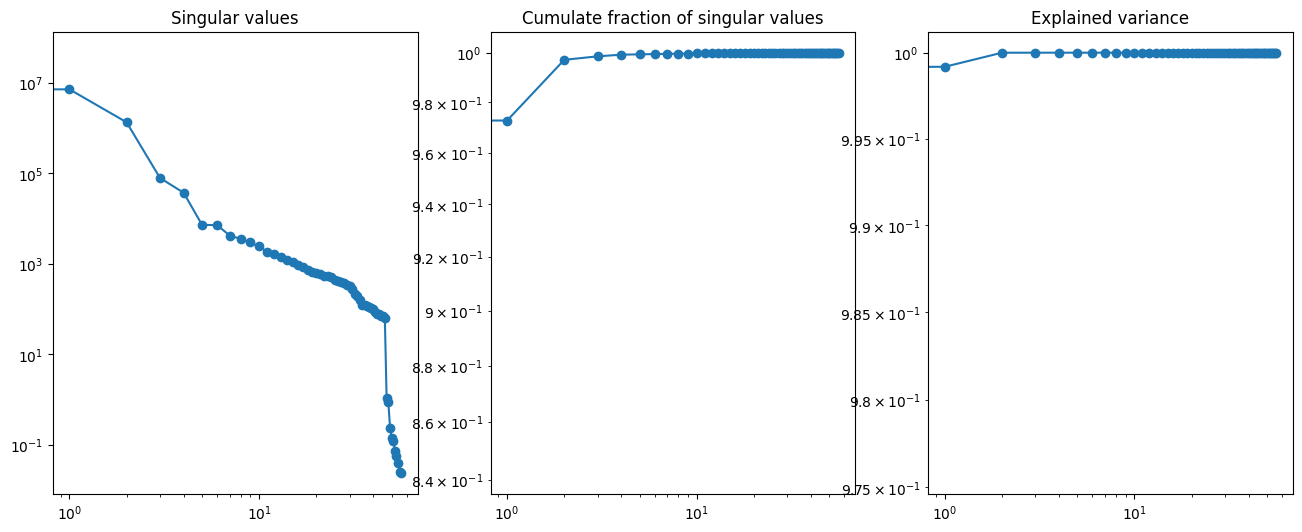

In [19]:
fig, axs = plt.subplots(1,3,figsize = (16,6))
axs[0].set_title("Singular values")
axs[0].loglog(s, "o-")

axs[1].set_title("Cumulate fraction of singular values")
# We compute the cumulative sum and we normalize it
cumulative_fraction = np.cumsum(s) / np.sum(s)
axs[1].loglog(cumulative_fraction, "o-")

axs[2].set_title("Explained variance")
explained_variance = np.cumsum(s**2) / np.sum(s**2)
axs[2].loglog(explained_variance, "o-")

In [20]:
colors = {'blues':'tab:blue', 'classical':'tab:orange', 'country':'tab:green', 'disco':'tab:red', 'hiphop':'tab:purple', 'jazz':'tab:brown',
          'metal':'tab:pink', 'pop':'tab:grey', 'reggae':'tab:olive', 'rock':'tab:cyan'}

2D plot:

Text(0, 0.5, '2nd\xa0principal\xa0component')

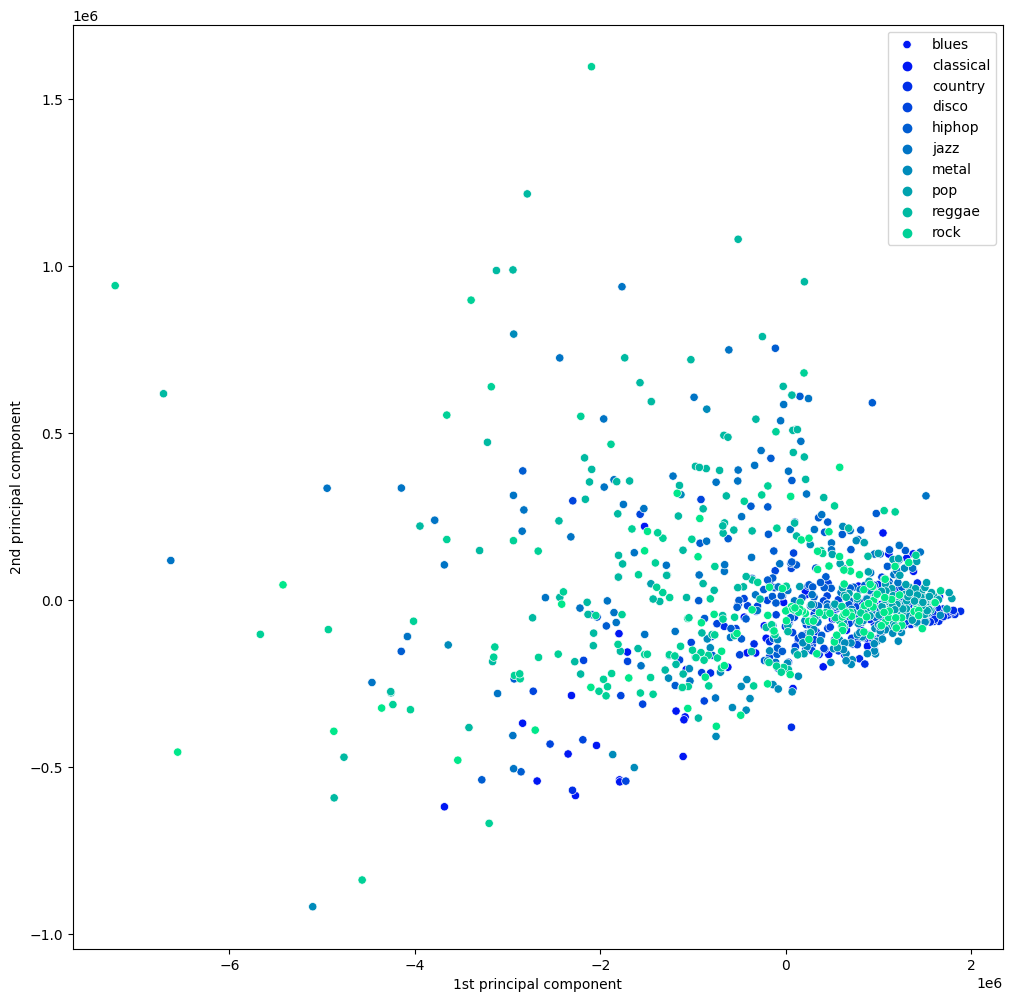

In [21]:
fig, ax = plt.subplots(figsize=(12,12))
sns.scatterplot(x=Phi[0,:], y=Phi[1,:], hue=labels, palette='winter', ax=ax)
ax.legend(colors)
ax.set_xlabel('1st principal component')
ax.set_ylabel('2nd principal component')

3D plot:

Text(0.5, 0, '3rd\xa0principal\xa0component')

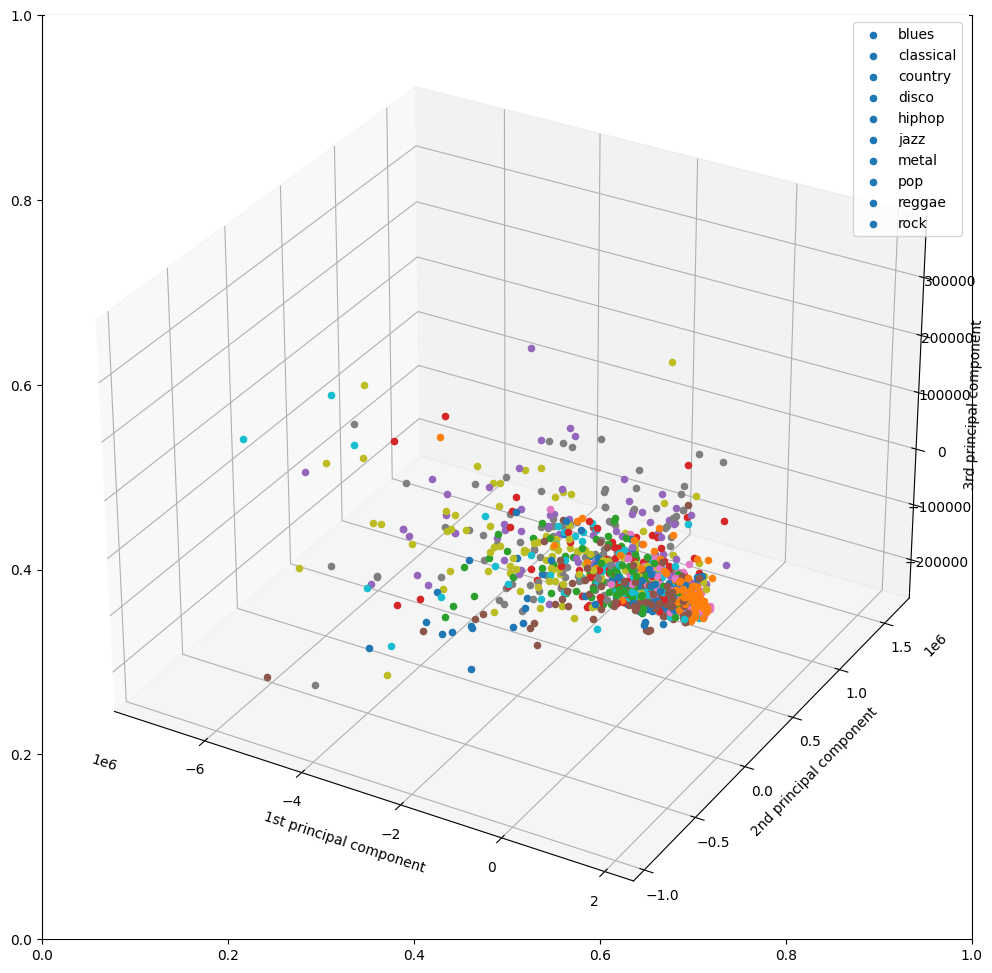

In [22]:
from mpl_toolkits import mplot3d

fig, ax = plt.subplots(figsize=(12,12))
ax = plt.axes(projection='3d')


for i in range(len(labels)):
    ax.scatter(Phi[0,i], Phi[1,i], Phi[2,i], color=colors[labels[i]])


ax.legend(colors)
ax.set_xlabel('1st principal component')
ax.set_ylabel('2nd principal component')
ax.set_zlabel('3rd principal component')